In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
def plot_true_2d(x,Mu,sigma):

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    fig1.suptitle('2D true density')


    f0 = np.linspace(x[:,0].min(),x[:,0].max())
    f1 = np.linspace(x[:,1].min(),x[:,1].max())
    X, Y = np.meshgrid(f0,f1)

    for c in range(3):
        def pdf(point):
            part1 = 1 / (2* np.pi) * (np.linalg.det(sigma[c])**(1/2))
            part2 = (-1/2) * ((point - Mu[c]).T @ (np.linalg.inv(sigma[c]))) @((point-Mu[c]))
            return float(part1 * np.exp(part2))
        z = np.array([pdf(np.array(ponit)) for ponit in zip(np.ravel(X),np.ravel(Y))])
        Z = z.reshape(X.shape)
        ax1.contour(X, Y, Z,colors=color[c])

def plot_true_3d(x,Mu,sigma):

    fig2 = plt.figure(figsize=(6,6))
    ax2 = plt.axes(projection='3d')
    fig2.suptitle('3D true density')
    ax2.view_init(10,-100)
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_zlabel("P(X)")
    ax2.view_init(10,-100)



    f0 = np.linspace(x[:,0].min(),x[:,0].max())
    f1 = np.linspace(x[:,1].min(),x[:,1].max())
    X, Y = np.meshgrid(f0,f1)

    for c in range(3):
        def pdf(point):
            part1 = 1 / (2* np.pi) * (np.linalg.det(sigma[c])**(1/2))
            part2 = (-1/2) * ((point - Mu[c]).T @ (np.linalg.inv(sigma[c]))) @((point-Mu[c]))
            return float(part1 * np.exp(part2))
        z = np.array([pdf(np.array(ponit)) for ponit in zip(np.ravel(X),np.ravel(Y))])
        Z = z.reshape(X.shape)

        #ax2.plot_surface(X, Y,Z,alpha=.3,rstride=1,cstride=1,color=color[c],edgecolor='none')
        ax2.contour3D(X, Y, Z,60, colors=color[c])

def hist(data,h):

    bin11 = np.arange(data[:,0].min(),data[:,0].max(),h)
    bin12 = np.arange(data[:,1].min(),data[:,1].max(),h)
    minbin = min(len(bin11),len(bin12))
    bin11 = bin11[0:minbin]
    bin12 = bin12[0:minbin]

    size = [minbin,minbin]
    p1 = np.zeros(size)

    for a in range(0,minbin):

        for b in range(0,minbin):
            s = 0
            p = 0

            for j in range(0,len(data)):
                if ((data[j,0] > bin11[a]) and (data[j, 1] > bin12[b]) and (data[j,0] < bin11[a] + h) and (data[j,1] < bin12[b] + h)):
                    s += 1
                    #print("[",a," ",b,"]:",s)
            p = s / (len(data) * (h ** 2))
            p1[a,b] = p

    x, y = np.meshgrid(bin11, bin12)
    return (x,y,p1)



def plothist(class1,class2,class3,h_set):

    fig2d = plt.figure(figsize=(12,5))
    fig3d = plt.figure(figsize=(12,5))
    fig2d.suptitle('2D histogram')
    fig3d.suptitle('3D histogram')


    pos = 1

    for h in h_set:
        ax2d = fig2d.add_subplot(1, 3, pos)
        ax3d = fig3d.add_subplot(1, 3, pos,projection='3d')

        title = "h = %0.2f" % (h)
        pos = pos +1

        ax2d.set_xlabel('X1')
        ax2d.set_ylabel('X2')
        ax2d.set_title(title)

        ax3d.set_xlabel('X1')
        ax3d.set_ylabel('X2')
        ax3d.set_zlabel('P(X)')
        ax3d.set_title(title)
        ax3d.view_init(10,-100)


        for i in range(0,3):
            if (i==0):
                x,y,p = hist(class1,h)
                ax2d.contour(x, y, p,colors=color[i])
                ax3d.plot_surface(x, y, p,color=color[i])



            if(i==1):
                x,y,p = hist(class2,h)
                ax2d.contour(x, y, p,colors=color[i])
                ax3d.plot_surface(x, y, p,color = color[i])


            if(i==2):
                x,y,p = hist(class3,h)
                ax2d.contour(x, y, p,colors=color[i])
                ax3d.plot_surface(x, y, p,color =color[i])

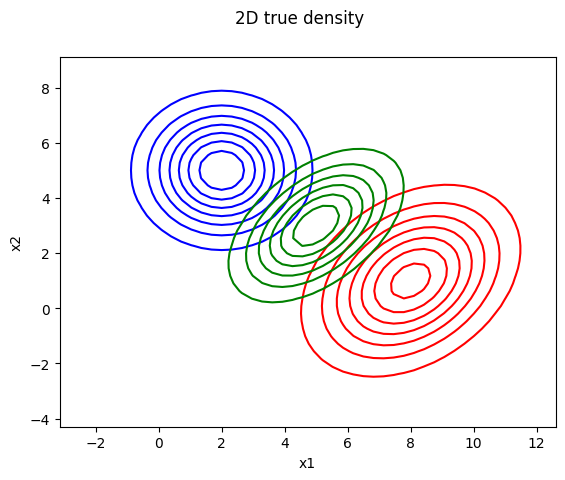

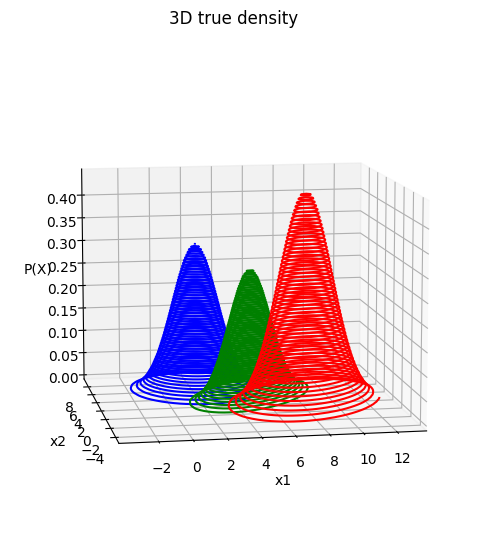

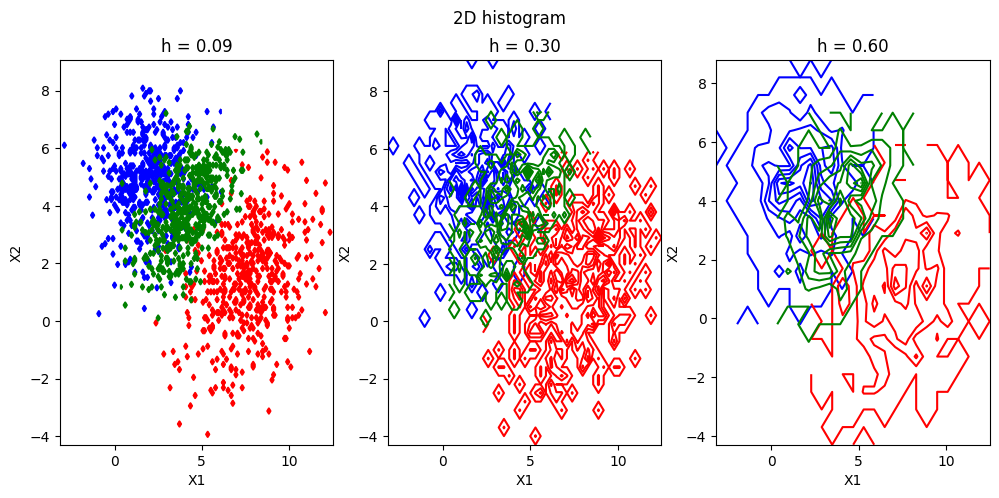

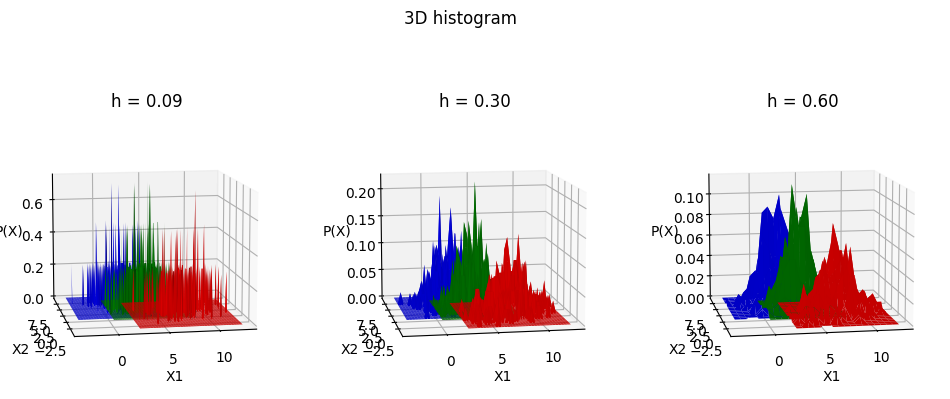

In [27]:
h_set = np.array([0.09, 0.3, 0.6])

N = 500

mu1 = np.array([2,5])
mu2 = np.array([8,1])
mu3 = np.array([5,3])
means = [None] * 3
means[0] = mu1
means[1] = mu2
means[2] = mu3

cov1 = np.array([[2,0],[0,2]])
cov2 = np.array([[3,1],[1,3]])
cov3 = np.array([[2,1],[1,2]])
covariances = [None] * 3
covariances[0] = cov1
covariances[1] = cov2
covariances[2] = cov3


class1 = np.random.multivariate_normal(mu1, cov1, N)
class2 = np.random.multivariate_normal(mu2, cov2, N)
class3 = np.random.multivariate_normal(mu3, cov3, N)

data = np.concatenate([class1, class2 , class3 ], axis=0)

color = ['blue','red','green']


plot_true_2d(data,means,covariances)
plot_true_3d(data,means,covariances)
plothist(class1,class2,class3,h_set)

plt.show()
